In [1]:
# https://www.kaggle.com/phyothuhtet/document-clustering-self-organizing-map-kmeans
# https://www.oneoffcoder.com/2019/10/02/latent-dirichlet-allocation/

In [2]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [3]:
# Import Dataset
meta_data = pd.read_csv('clean_meta_data_5000.csv')
meta_data.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,No Information Available,No Information Available,No Information Available,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,No Information Available
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,No Information Available,No Information Available,No Information Available,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,No Information Available
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,No Information Available,No Information Available,No Information Available,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,No Information Available
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,No Information Available,No Information Available,No Information Available,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,No Information Available
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,No Information Available,No Information Available,No Information Available,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,No Information Available


In [4]:
#TF_IDF (Term Frequency Inverse Data Frequency)
from sklearn.feature_extraction.text import TfidfVectorizer

def tf_idf(data):
    tfidf = TfidfVectorizer( stop_words='english',use_idf=True)
    tfidf_matrix = tfidf.fit_transform(data)
    return tfidf_matrix

In [5]:
#Create a matrix with tfidf for the column abstract
tfidf_matrix = tf_idf(meta_data['abstract'])

In [6]:
#Use consine simliartiy to explore which documents have more similar respresentaiton
from sklearn.metrics.pairwise import linear_kernel
cos_similarities = linear_kernel(tfidf_matrix[0:1], tfidf_matrix).flatten()

#10 most related documents indices
related_docs_indices = cos_similarities.argsort()[:-11:-1]
print("Related Document:\n",related_docs_indices)

#Cosine Similarties of related documents
print("Cosine Similarites of related documents:\n",cos_similarities[related_docs_indices])

Related Document:
 [   0 4884 1089 4711 2314 3809 2128 1023  608  440]
Cosine Similarites of related documents:
 [1.         0.29669923 0.28487398 0.27435953 0.27198009 0.26657559
 0.26455665 0.26454158 0.25638668 0.24361469]


In [7]:
#Take a look at two most similar document
meta_data.iloc[0]['abstract']

'OBJECTIVE: This retrospective chart review describes the epidemiology and clinical features of 40 patients with culture-proven Mycoplasma pneumoniae infections at King Abdulaziz University Hospital, Jeddah, Saudi Arabia. METHODS: Patients with positive M. pneumoniae cultures from respiratory specimens from January 1997 through December 1998 were identified through the Microbiology records. Charts of patients were reviewed. RESULTS: 40 patients were identified, 33 (82.5%) of whom required admission. Most infections (92.5%) were community-acquired. The infection affected all age groups but was most common in infants (32.5%) and pre-school children (22.5%). It occurred year-round but was most common in the fall (35%) and spring (30%). More than three-quarters of patients (77.5%) had comorbidities. Twenty-four isolates (60%) were associated with pneumonia, 14 (35%) with upper respiratory tract infections, and 2 (5%) with bronchiolitis. Cough (82.5%), fever (75%), and malaise (58.8%) were 

In [8]:
meta_data.iloc[4884]['abstract']

'Acute respiratory disease is one of the most common reasons to consult a general practitioner. A substantial part of these diseases cannot be explained by an infection with a virus or a common pathogenic bacterium. To study this diagnostic deficit, the prevalence of Chlamydia pneumoniae and Mycoplasma pneumoniae infections was determined in two groups of patients consulting a general practitioner. DNA of C. pneumoniae and M. pneumoniae was detected by a polymerase chain reaction (PCR) in nose/throat swabs from six (1.1%), and from seven (1.3%) patients, respectively, of 557 patients consulting a general practitioner for complaints suggestive for a virus infection during the 1994/1995 respiratory infections season. Two patients remained C. pneumoniae PCR-positive for at least 4 weeks. All others were negative within 3 weeks. Double infections of C. pneumoniae and influenza virus (3/6), and of M. pneumoniae and respiratory syncytial virus (1/7) or rhinovirus (1/7) were diagnosed. During

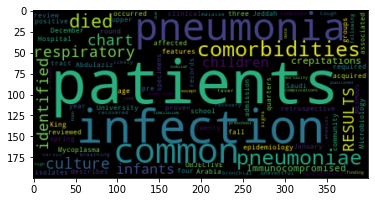

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(meta_data.iloc[0]['abstract'])
plt.imshow(wordcloud, interpolation="bilinear")

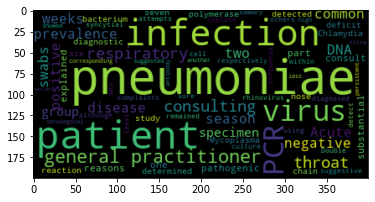

In [10]:
wordcloud = WordCloud().generate(meta_data.iloc[4884]['abstract'])
plt.imshow(wordcloud, interpolation="bilinear")

In [15]:
# Gaussian mixture models (GMMs)

from scipy.sparse.linalg import svds
from sklearn.mixture import GaussianMixture

def get_gmm_labels(X, k):
    gmm = GaussianMixture(n_components=k, max_iter=200, random_state=37)
    gmm.fit(X)
    aic = gmm.aic(X)
    print('{}: aic={}'.format(k, aic))
    return k, aic

X = tfidf_matrix
U, S, V = svds(X, k=20)
nums = [2,10,20,40,80,120,150,180,200,300, 400,500]
gmm_scores = [get_gmm_labels(U, k) for k in nums]

2: aic=-631090.1971189969
10: aic=-708668.6184433291
20: aic=-726172.2744490945
40: aic=-734549.612646188
80: aic=-735503.6520061318
120: aic=-734951.7125605905
150: aic=-733198.9475160324
180: aic=-732090.434496535
200: aic=-730338.8306297901
300: aic=-719181.7181366219
400: aic=-698044.6215782355
500: aic=-671529.3770192856


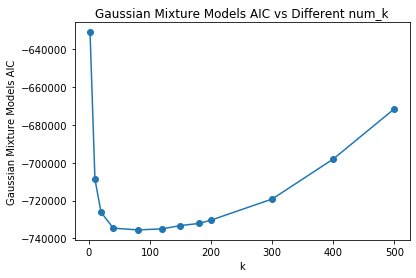

In [28]:
# plot Gaussian Mixture Models AIC vs Different num_k

def plot_scores(scores, ylabel):
    xs = [s[0] for s in scores]
    ys = [s[1] for s in scores]
    plt.plot(xs, ys, 'o')  
    plt.plot(xs, ys, color='tab:blue')
    plt.xlabel('k')
    plt.ylabel(ylabel)
    plt.title('{} vs Different num_k'.format(ylabel))


plot_scores(gmm_scores, 'Gaussian Mixture Models AIC')


In [22]:
# k-means clustering (KMC)
# Silhouette score ranges from -1 and 1. The larger, the better：
# si is close to 1, indicating that the clustering of sample i is reasonable;
# si is close to -1, indicating that sample i should be classified into another cluster;
# If si is approximately 0, then the sample i is on the boundary of the two clusters.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def get_kmc(X, k):
    model = KMeans(k, random_state=37)
    model.fit(X)
    labels = model.predict(X)
    score = silhouette_score(X, labels)
    print('{}: score={}'.format(k, score))
    return k, score

kmc_scores = [get_kmc(X, k) for k in nums]


2: score=0.0043222175668880605
10: score=0.004821054659792429
20: score=0.006237996313099742
40: score=0.009822985352289005
80: score=0.015046058635064963
120: score=0.017191927481620024
150: score=0.01821558175782884
180: score=0.018859365677707133
200: score=0.019673643114612293
300: score=0.020355440288313726
400: score=0.020046628605950086
500: score=0.02419995492321356


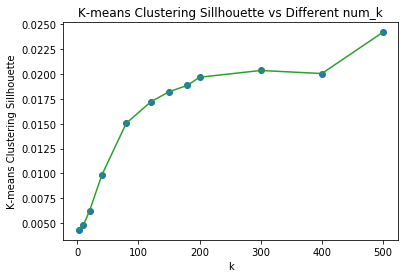

In [27]:
# plot K-means Clustering Sillhouette vs Different num_k
def plot_scores_2(scores, ylabel):
    xs = [s[0] for s in scores]
    ys = [s[1] for s in scores]
    plt.plot(xs, ys, 'o')  
    plt.plot(xs, ys, color='tab:green')
    plt.xlabel('k')
    plt.ylabel(ylabel)
    plt.title('{} vs Different num_k'.format(ylabel))


plot_scores_2(kmc_scores, 'K-means Clustering Sillhouette')